# Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Importing necessary Libraries


In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

# Importing the dataset

In [93]:
df= pd.read_csv(r'E:\sheeba working\census_income.csv')

In [94]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Observation:
   
    1)The given dataset as annual income of the particular persons and in this project we have to use classification problem to predict the income of the persons is over$50l/year or not.
    
    2)It as both numerical and categorical columns

In [95]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


# Exploratory Data Analysis(EDA)

In [96]:
df.shape

(32560, 15)

The dataset contains 32560 rows and 15 columns..there are more independent features except the target column

In [97]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

The dataset contains 2 types of data namely integer type and object type.
We will convert this object type data into numerical using encoding techniquies before building the model.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [99]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


Here we can see number of unique values in each columns

In [100]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No missing values present in the dataset

# Visualizations

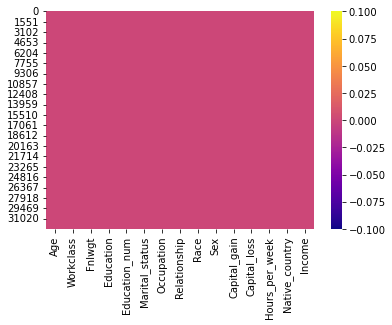

In [101]:
# let's visualize the null values clearly
sns.heatmap(df.isnull(),cmap='plasma')
plt.show()

From the plot clearly visualize that there is no missing values

In [102]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Value Count Function

Let's check the list of value counts in each columns to find if there are any unexpected or corrupted entries in the dataset.

In [103]:
for i in df.columns:
    print(df[i].value_counts())
    print('==========================================================')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int6

In [104]:
# droping the columns having more number of 0's
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

In [105]:
df['Workclass'] =df.Workclass.str.replace('?','Private')
df['Occupation'] =df.Occupation.str.replace('?','Prof-speciality')
df['Native_country'] =df.Native_country.str.replace('?','United-States')

In [106]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [108]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Prof-speciality      1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [109]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [110]:
df.Workclass=df.Workclass.replace([' Local-gov',' State-gov',' Federal-gov' ],' Govt-Sector')
df.Workclass=df.Workclass.replace([' Private',' Self-emp-not-inc',' Self-emp-inc' ],' Pvt-Sector')
df.Workclass=df.Workclass.replace([' Without-pay',' Never-worked'],'Not-working')


In [111]:
df["Workclass"].value_counts()


 Pvt-Sector     28189
 Govt-Sector     4350
Not-working        21
Name: Workclass, dtype: int64

In [112]:
df["Education"]=df["Education"].replace([' Preschool',' 1st-4th',' 5th-6th',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],' School')
df["Education"]=df["Education"].replace([' HS-grad',' Prof-school'],' High-School')
df["Education"]=df["Education"].replace([' Some-college',' Assoc-voc',' Assoc-acdm'],' Secondary-School')
df["Education"]=df["Education"].replace([' Bachelors'],' Under_Graduation')
df["Education"]=df["Education"].replace([' Masters'],' Post_Graduation')
df["Education"]=df["Education"].replace([' Doctorate'],' PhD')


In [113]:
df["Education"].value_counts()

 High-School         11077
 Secondary-School     9740
 Under_Graduation     5354
 School               4253
 Post_Graduation      1723
 PhD                   413
Name: Education, dtype: int64

In [114]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated',' Married-spouse-absent',],' Others')

In [115]:
df["Marital_status"].value_counts()

 Married    14999
 Single     10682
 Others      6879
Name: Marital_status, dtype: int64

We have replaced the workclass,Education,maritial status

In [116]:
# let's check the dataframe
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Pvt-Sector,83311,Under_Graduation,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Pvt-Sector,215646,High-School,9,Others,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Pvt-Sector,234721,School,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Pvt-Sector,338409,Under_Graduation,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Pvt-Sector,284582,Post_Graduation,14,Married,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [117]:
# checking the list of value counts in Income
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [118]:
# checking wheather the dataset contains any space
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income


In [119]:
# statistical summary of dataset
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,40.437469
std,13.640642,1.055498e+05,2.572709,12.347618
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


From the above description we can observe the following things.

The counts of all the columns are same which means there is no missing values present in any columns
The mean is greater than the meadian(50%) in some columns which means they are skewed to right.
The mean and the median(50%) are almost equal in Education_num and Hours_per_week which means the data is symmetric in these columns hence the data is normal and no skewness present here.
There is a huge difference in 75% and max it shows that huge outliers present in the columns.
In summarising the data we can observe that the dataset contains the person's age between 17 years to 90 years.

In [121]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


These are the categorical columns present in the dataset

In [122]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Data Visualization

# Univariate Analysis

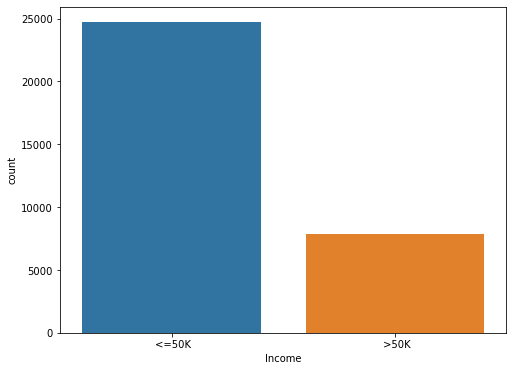

In [123]:
# Visualize the whether the income is above 50k or not
plt.figure(figsize=(8,6))
sns.countplot(df['Income'])
plt.show()

Most of the people have the income less than or equal to 50k

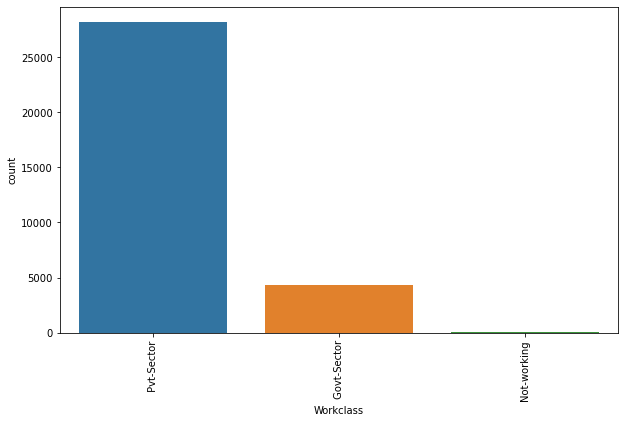

In [124]:
# visualize the count of workclass of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
plt.show()

observation:peoples working on the private sector as highest count compared with others.
            
    


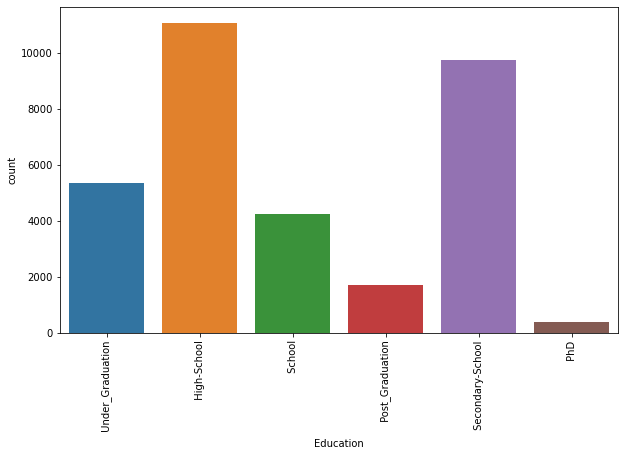

In [125]:
# visualize the count Education of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

from the plot,majority of peoples as high school graduation and ph.d as less compared with others

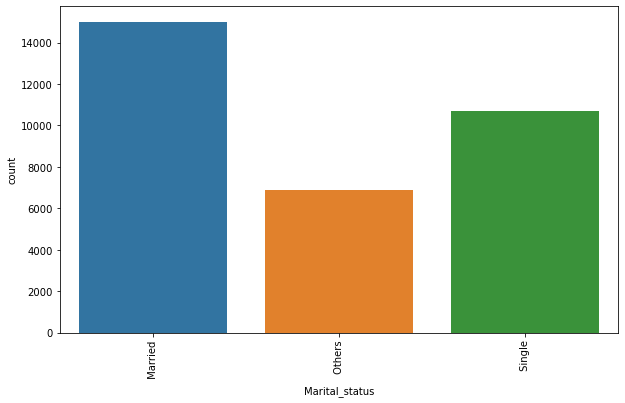

In [126]:
# visualize the marital status of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Marital_status"])
plt.xticks(rotation=90)
plt.show()

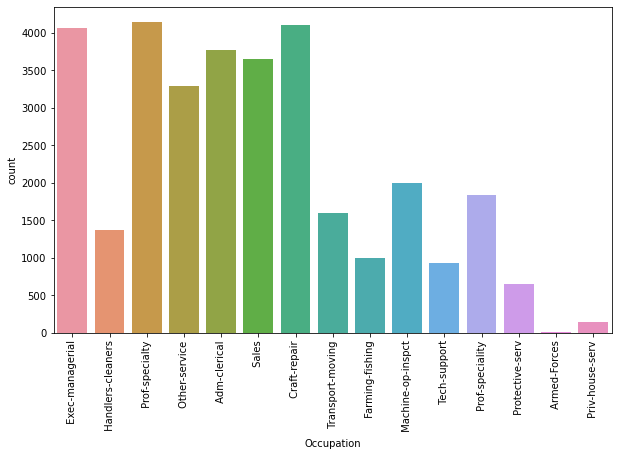

In [127]:
# visualize the count of Occupation of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Occupation"])
plt.xticks(rotation=90)
plt.show()

prof-speciality have the highest count and armed forces as the less count

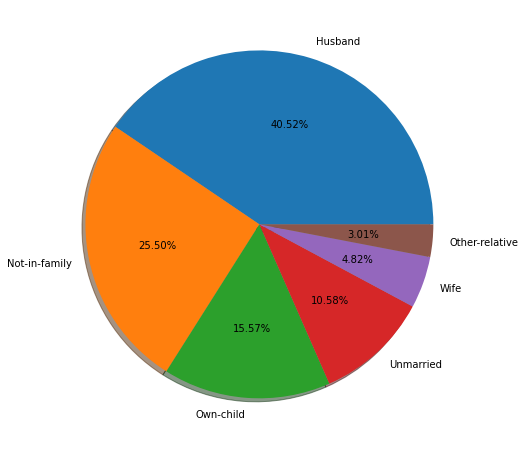

In [128]:
# visualize the count of Relationship of the people
labels = 'Husband', 'Not-in-family','Own-child','Unmarried','Wife','Other-relative'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['Relationship'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

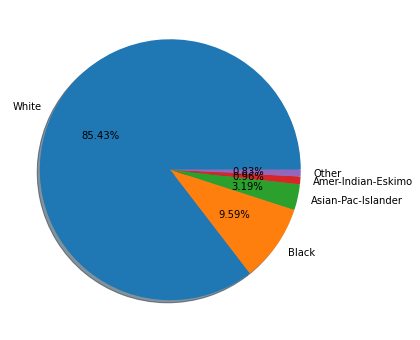

In [38]:
# visualize the count of Race of the people

labels='White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['Race'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

white family as high count of 85% and other has the least count of 0.83%

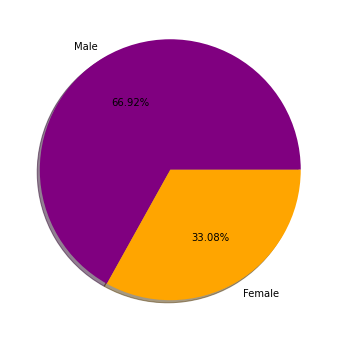

In [129]:
# visualize the count of Sex group of the people

labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,6))
colors = ["purple","orange"]
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True, colors=colors)
plt.show()


male count is high and compared with female

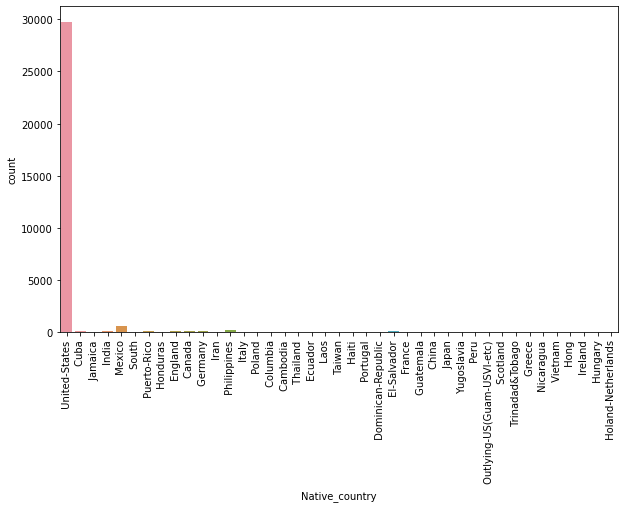

In [130]:
# visualizing the Native country of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

The United States country has highest count of around 29k and other countries have very less counts.

# Distribution of skewness

Plotting numerical columns

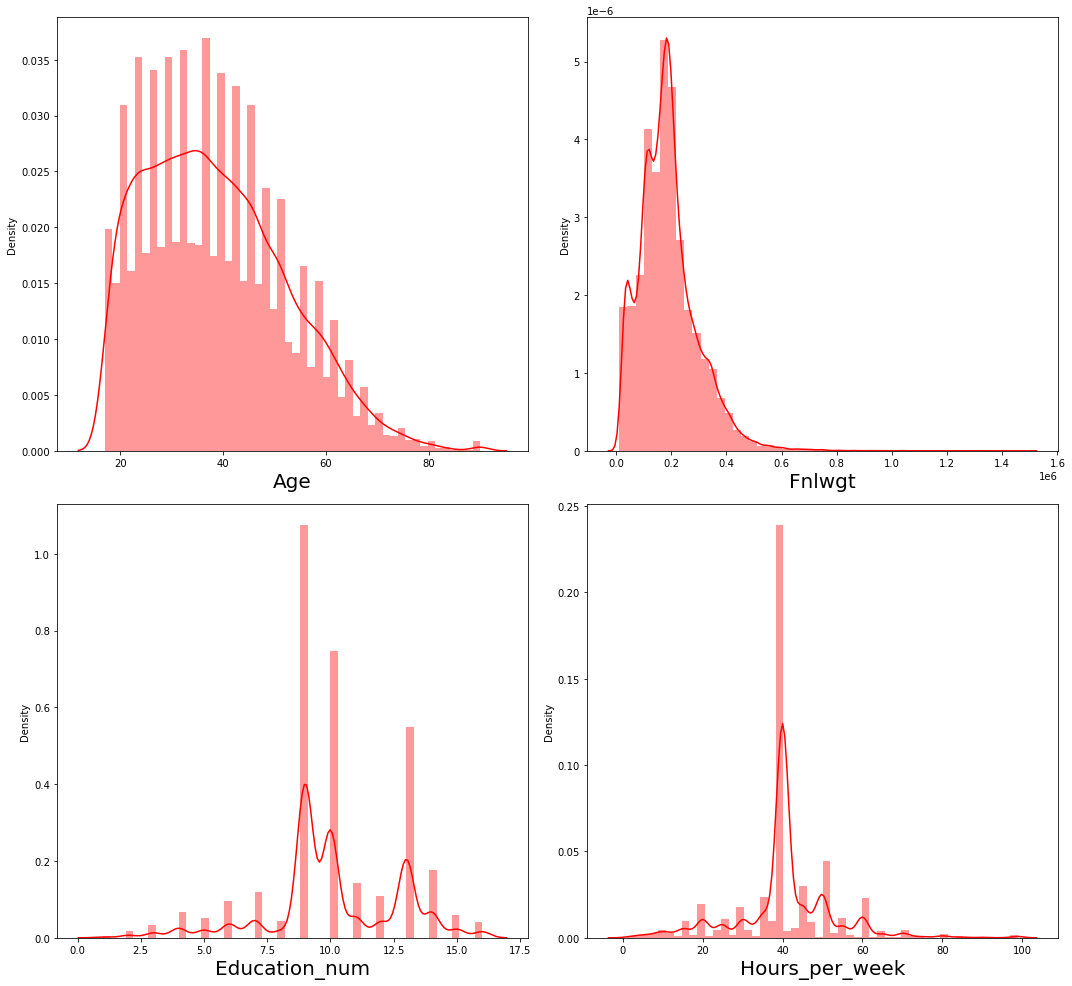

In [131]:
# checking how the data has been distributed in each column

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

observation:
    
    1)From the above distribution plot it can be inferred that Age column seems to be normal but the mean is more than the median , so it is skewed to right.
    
    2)The data is not normal in the above columns and the columns final weight, capital gain an dcapital loss have right skewness since the mean is more in this case.
    
    3)The data in the columns Education num and Hoursper week are not normal but they have no skewness.

# Bivariate Analysis

1)Age

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

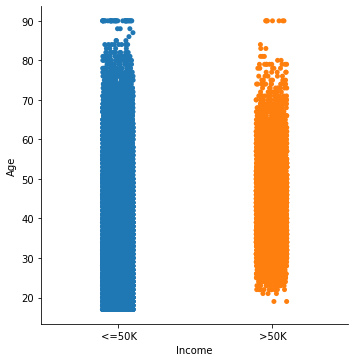

In [132]:
# visualizing the age of the people who have the income more
sns.catplot(df['Income'],df['Age'], data=df,kind='strip',size=5);
plt.title('Comparision between Income and Age')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

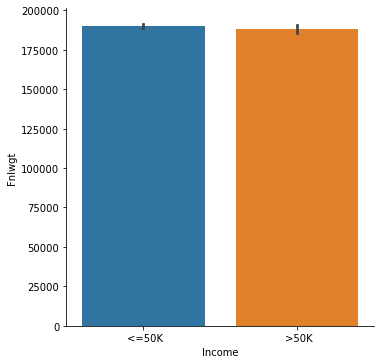

In [133]:
# visualizing the Final weight with income
sns.catplot(df['Income'],df['Fnlwgt'], data=df,kind='bar');
plt.title('Comparision between Income and Final weight')
plt.show()

Education_num

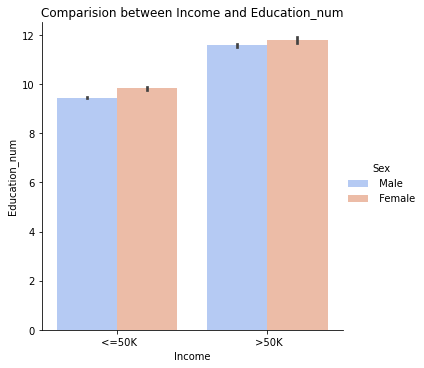

In [134]:
# visualizing the number of education with income
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="coolwarm")
plt.title("Comparision between Income and Education_num")
plt.show()

The Income is more than 50k for the people having high education number . Here both gender have the income more than 50k

Hour Per Week

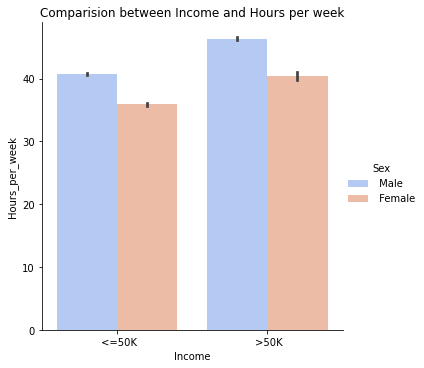

In [135]:
# visualizing the number of Hours per week with income
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar', hue='Sex',palette='coolwarm');
plt.title('Comparision between Income and Hours per week')
plt.show()

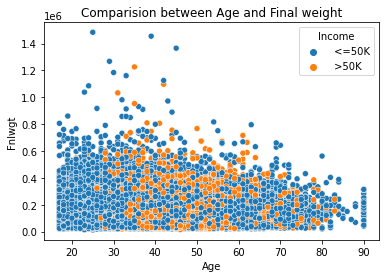

In [136]:
# visualizing how the income changes with work class of the people
sns.scatterplot(x='Age',y='Fnlwgt', data=df,hue='Income');
plt.title('Comparision between Age and Final weight')
plt.show()

Workclass

<Figure size 720x432 with 0 Axes>

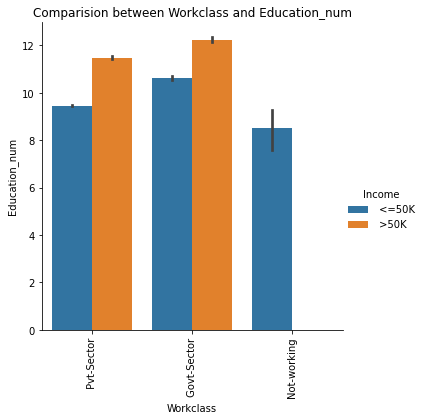

In [137]:
# visualizing how the income changes with work class of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Workclass',y='Education_num',data=df,kind='bar',hue='Income');
plt.title('Comparision between Workclass and Education_num')
plt.xticks(rotation=90)
plt.show()

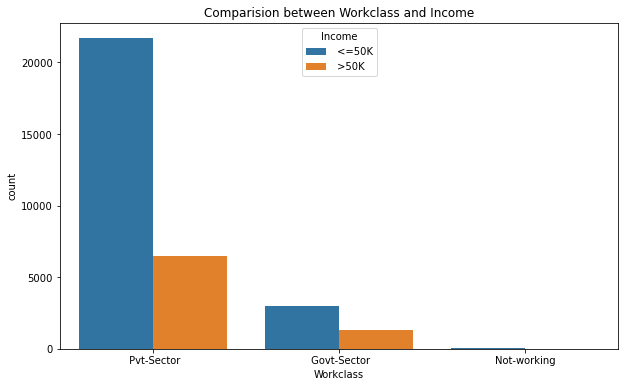

In [49]:
# visualizing the relation between work class and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Workclass'],hue=df['Income'])
plt.title('Comparision between Workclass and Income')
plt.show()

The people who are working in the private sectors have the income <=50k an dthe only few of the people in the same sector have income >50k .

Also the people who never worked they don't have the income.

Education

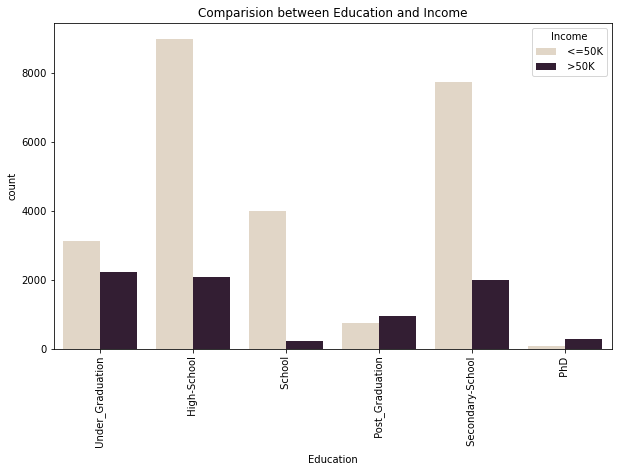

In [138]:
# visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Education'],hue=df['Income'],palette="ch:.25")
plt.title('Comparision between Education and Income')
plt.xticks(rotation=90)
plt.show()

Marital_status

<Figure size 720x432 with 0 Axes>

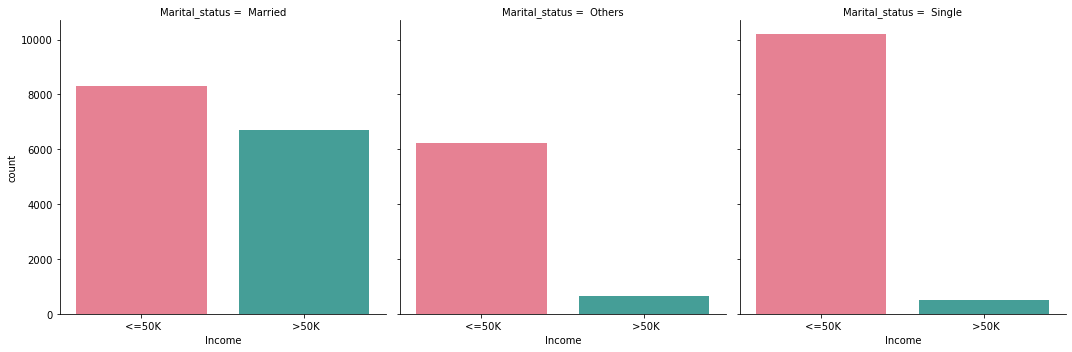

In [139]:
# visualizing the relation between Marital status and Income of the people
plt.figure(figsize=(10,6))
sns.catplot(x='Income', col='Marital_status',data=df,kind='count',palette='husl')
plt.show()

Occupation

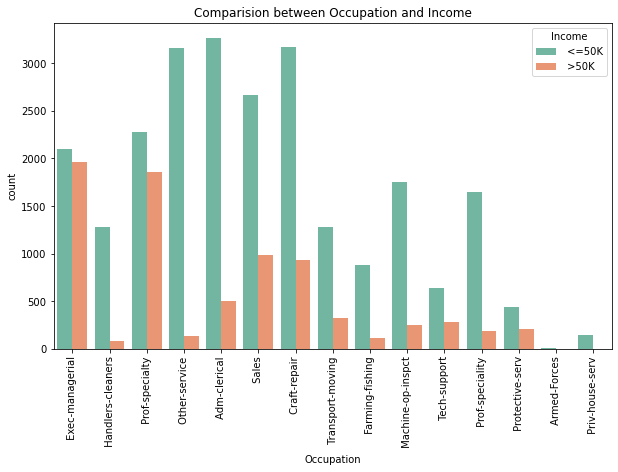

In [140]:
# visualizing the relation between Occupation and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Occupation'],hue=df['Income'],palette='Set2')
plt.title("Comparision between Occupation and Income")
plt.xticks(rotation=90)
plt.show()

Relationship

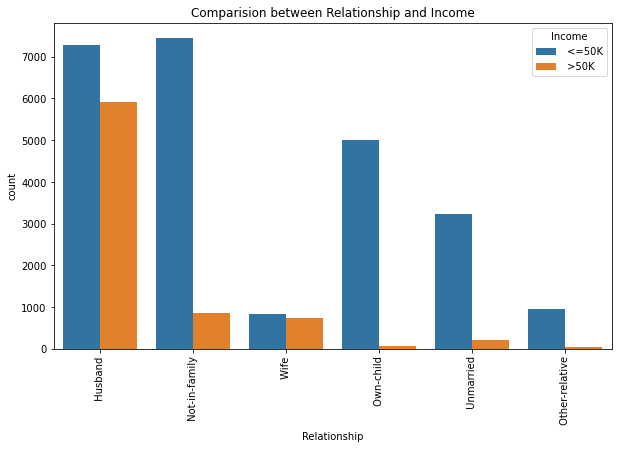

In [141]:
# visualizing the relation between Relationship and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Relationship'],hue=df['Income'])
plt.title('Comparision between Relationship and Income')
plt.xticks(rotation=90)
plt.show()

People who have the relationship of husband and wife have income >50k and the others relationship giving income <=50k

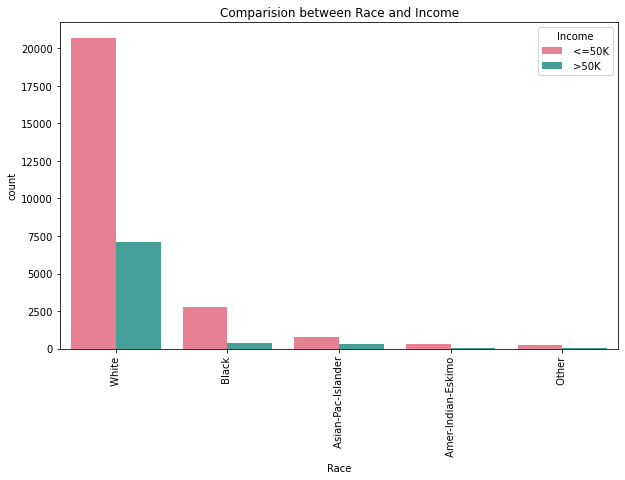

In [142]:
# visualizing the relation between Race and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="husl")
plt.title('Comparision between Race and Income')
plt.xticks(rotation=90)
plt.show()

The White family groups have high income >50k compare to other groups

Sex

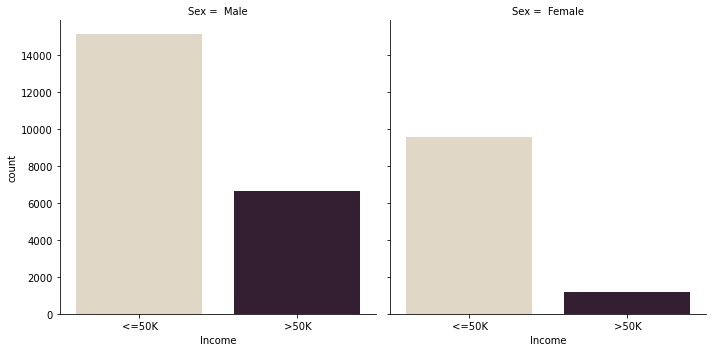

In [143]:
# visualizing the relation between Income and Sex groups of the people
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="ch:.28")
plt.show()


Native country

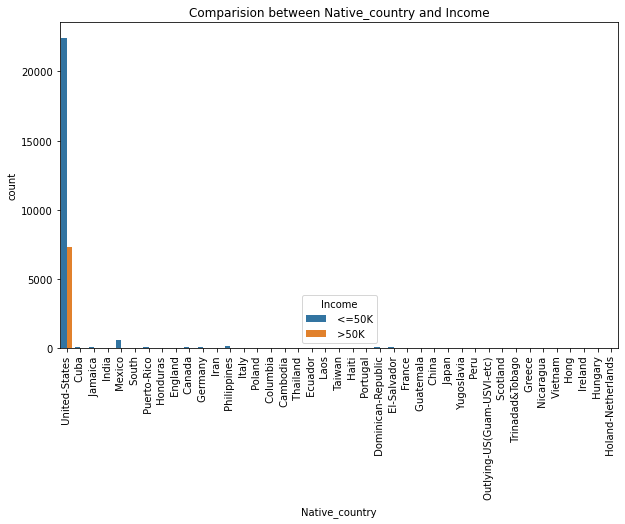

In [144]:
# visualizing the relation between Native country and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df['Native_country'],hue=df['Income'])
plt.title('Comparision between Native_country and Income')
plt.xticks(rotation=90)
plt.show()

from this plot,US earns more income compared to other countries.

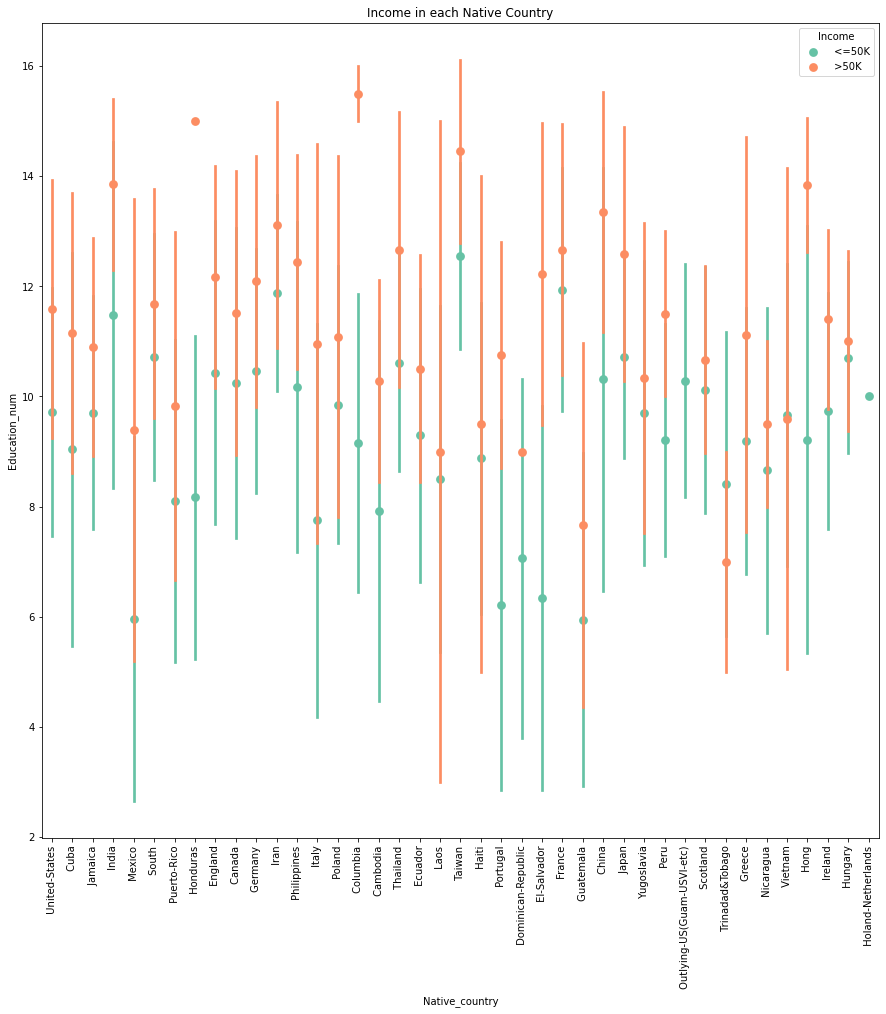

In [145]:
# visualizing how the income changes for Native country of the people
plt.figure(figsize=(15,15))
plt.title('Income in each Native Country')
sns.pointplot(x='Native_country',y='Education_num',data=df, hue='Income',join=False,palette='Set2',ci='sd')
plt.xticks(rotation=90)
plt.show()

The countries having high education numbers have high income that is more than 50k

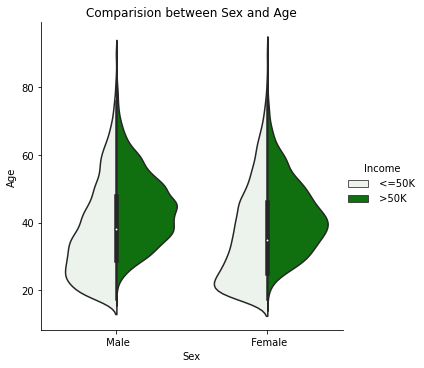

In [146]:
# visualizing the relationship between Sex and Age of the people

sns.catplot(x='Sex',y='Age', kind='violin',color='g',data=df,hue='Income',split=True)
plt.title("Comparision between Sex and Age")
plt.show()

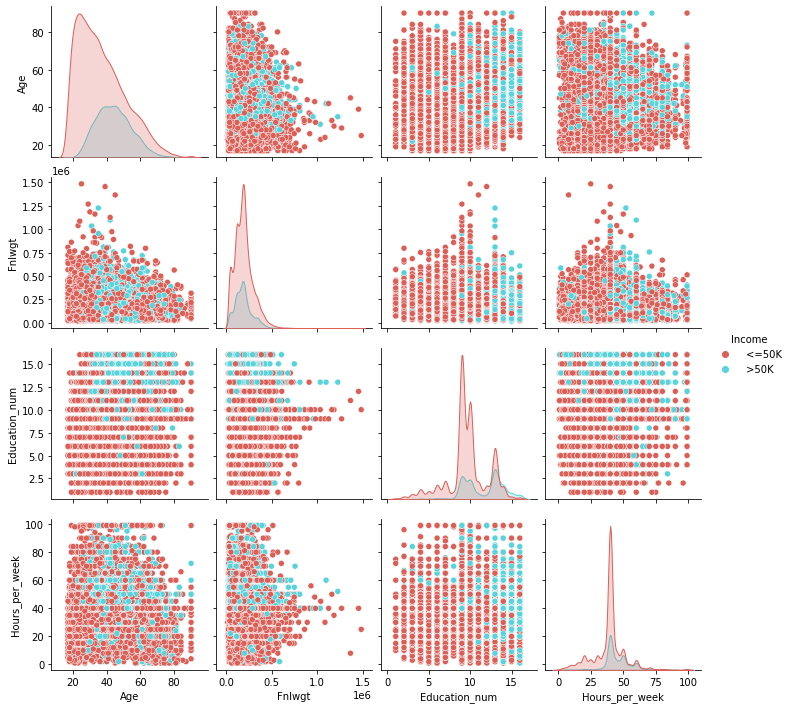

In [147]:
# checking the pairwise relation in the dataset.
sns.pairplot(df,hue='Income',palette='hls')

observation:
    
    1)This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Income'. Here we ca observe the relation between the features and label.
    
    2)Most of features are highly correlated with each other.
    
    3)Some of th efeatures have outliers and skewness , will remove them later.

# Outliers Handling

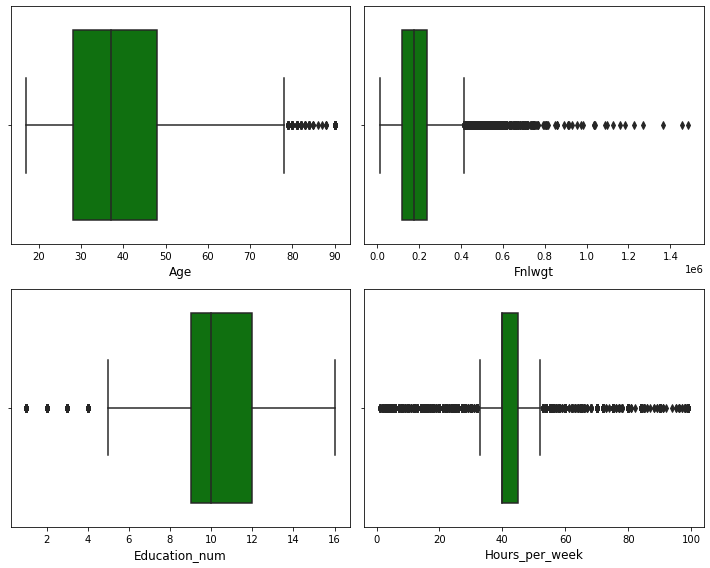

In [148]:
plt.figure(figsize=(10,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

The outliers present in all the columns we will remove it using ZSCORE method.

In [158]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [159]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=df.columns.values.tolist()

for col in features:
    if df[col].dtypes in numerics:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])


In [160]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,83311,5,13,0,3,0,4,1,13,38,0
1,38,1,215646,0,9,1,5,1,4,1,40,38,0
2,53,1,234721,3,7,0,5,0,2,1,40,38,0
3,28,1,338409,5,13,0,10,5,2,0,40,4,0
4,37,1,284582,2,14,0,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,4,12,0,13,5,4,0,38,38,0
32556,40,1,154374,0,9,0,6,0,4,1,40,38,1
32557,58,1,151910,0,9,1,0,4,4,0,40,38,0
32558,22,1,201490,0,9,2,0,3,4,1,20,38,0


# Removing Outliers
1. ZSCORE Method

In [161]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [163]:
threshold= 3 
print(np.where(z>3))

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([11, 10,  8, ...,  8,  8,  8], dtype=int64))


In [171]:
new_df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(32560, 13)
(29289, 13)


In [165]:
# checking the data loss%
data_loss =(32560-29289)/32560*100

In [166]:
data_loss

10.046068796068797

# 2. IQR Method

In [168]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR=Q3 - Q1

df1 = df[~((df <(Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [169]:
df1.shape

(10961, 13)

In [170]:
# checking the data loss %
data_loss = (32560-10961)/32560*100
data_loss

66.33599508599508

Using IQR method we are losing 66% of data,which is huge
So considering ZSCORE METHOD

# Checking the skewness

In [172]:
new_df.skew()

Age               0.466083
Workclass        -2.129943
Fnlwgt            0.629350
Education        -0.265992
Education_num    -0.134619
Marital_status    0.256641
Occupation        0.099802
Relationship      0.788850
Race             -2.621856
Sex              -0.716780
Hours_per_week   -0.348301
Native_country   -5.522265
Income            1.198322
dtype: float64

# Removing Skewness

In [173]:
new_df['Fnlwgt'] = np.cbrt(df['Fnlwgt'])
new_df.skew()

Age               0.466083
Workclass        -2.129943
Fnlwgt           -0.382405
Education        -0.265992
Education_num    -0.134619
Marital_status    0.256641
Occupation        0.099802
Relationship      0.788850
Race             -2.621856
Sex              -0.716780
Hours_per_week   -0.348301
Native_country   -5.522265
Income            1.198322
dtype: float64

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

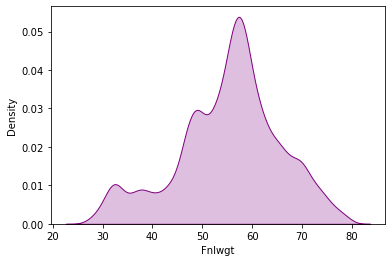

In [174]:
# After removing skewness. let's check how the data has been distributed in each column.
sns.distplot(new_df['Fnlwgt'],color='purple',kde_kws={'shade': True},hist=False)

# Correlation between the target variable and independent variables using HEAT map

In [175]:
# checking the relation between features and the target
cor = new_df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,-0.086553,-0.065576,-0.065928,0.056180,-0.476633,0.004058,-0.271267,0.023832,0.094680,0.096384,0.037465,0.250845
Workclass,-0.086553,1.000000,0.014642,-0.051563,-0.160212,0.034366,-0.008069,0.000516,0.060106,0.037299,-0.004486,-0.039272,-0.061499
Fnlwgt,-0.065576,0.014642,1.000000,-0.010209,-0.034203,0.034050,0.002371,0.016466,-0.101522,0.017041,-0.019643,-0.097860,-0.004942
Education,-0.065928,-0.051563,-0.010209,1.000000,0.318318,0.052580,0.052795,-0.002908,0.031339,-0.027100,-0.010669,-0.005153,0.089486
Education_num,0.056180,-0.160212,-0.034203,0.318318,1.000000,-0.066894,0.100896,-0.098098,0.086817,0.010863,0.165708,0.146001,0.338203
Marital_status,-0.476633,0.034366,0.034050,0.052580,-0.066894,1.000000,-0.005241,0.456314,-0.115253,-0.342325,-0.243814,-0.004460,-0.427265
Occupation,0.004058,-0.008069,0.002371,0.052795,0.100896,-0.005241,1.000000,-0.044784,0.007725,0.048641,-0.008051,0.023795,0.047540
Relationship,-0.271267,0.000516,0.016466,-0.002908,-0.098098,0.456314,-0.044784,1.000000,-0.145877,-0.582853,-0.268755,-0.012479,-0.252670
Race,0.023832,0.060106,-0.101522,0.031339,0.086817,-0.115253,0.007725,-0.145877,1.000000,0.125490,0.059607,0.021430,0.098158
Sex,0.094680,0.037299,0.017041,-0.027100,0.010863,-0.342325,0.048641,-0.582853,0.125490,1.000000,0.242315,-0.008584,0.217713


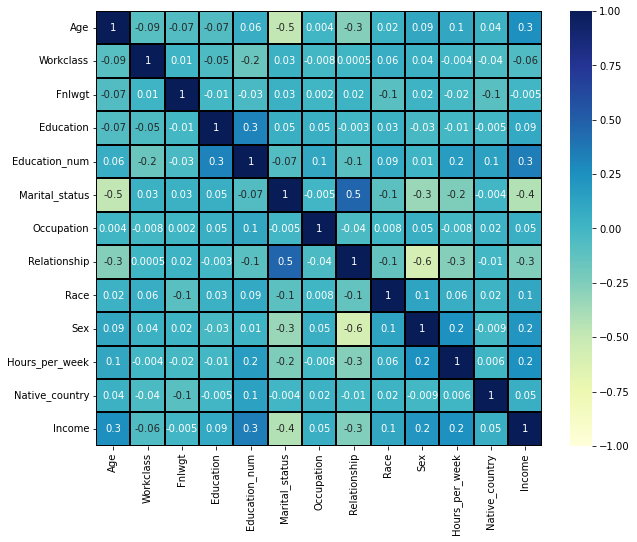

In [176]:
# visualizing the correlation matrix by plotting heat map
plt.figure(figsize=(10,8))
sns.heatmap(new_df.corr(),linewidths=.1, vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor='black',annot_kws={'size':10},cmap='YlGnBu')
plt.yticks(rotation=0);


observation:
    This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.

1)This heat map contains both positive and negative correlaion

2)There is no much correlation between the target and the label.

3)The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.

4)The columns Marital status and Relationship have less correlation with the label.

5)The columns Relationship and Sex are highly correlated with each other also the columns Fnlwgt has very less relation with the label so we can drop these columns if necessary.

6)There is no multicolinearity issue exists in the dat aso no need to worry much.

In [177]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.338203
Age               0.250845
Hours_per_week    0.243549
Sex               0.217713
Race              0.098158
Education         0.089486
Native_country    0.049354
Occupation        0.047540
Fnlwgt           -0.004942
Workclass        -0.061499
Relationship     -0.252670
Marital_status   -0.427265
Name: Income, dtype: float64

# Visualizing the correlation between label and features using bar plot

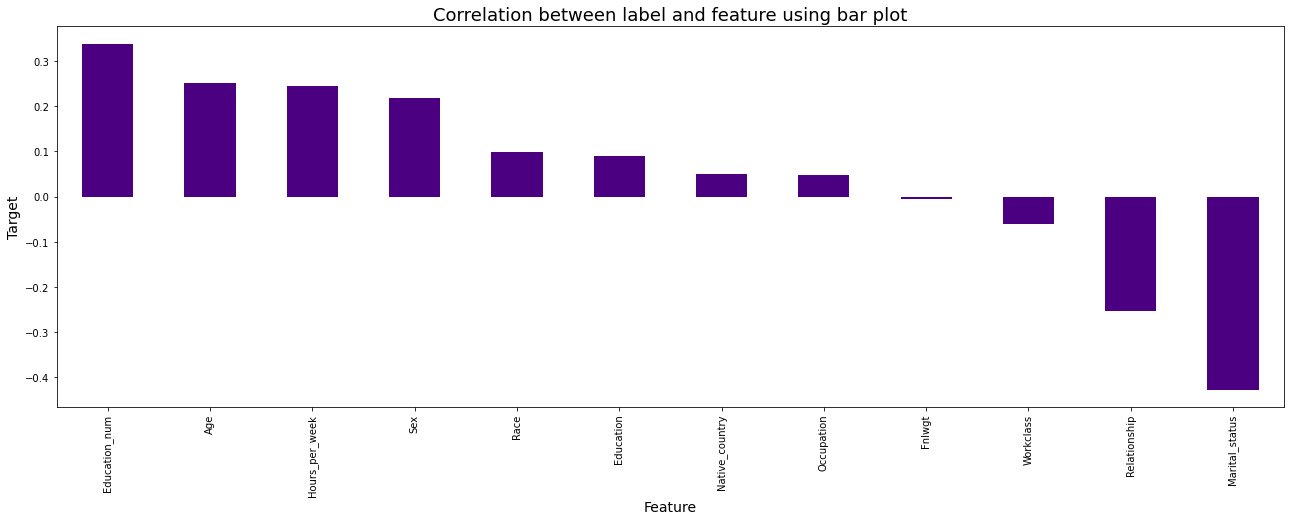

In [178]:
plt.figure(figsize=(22,7))
new_df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='indigo')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Separating the features and label variables into x and y

In [179]:
x = new_df.drop('Income', axis=1)
y = new_df['Income']

In [180]:
x.shape

(29289, 12)

In [181]:
y.shape

(29289,)

# Feature Scaling using Standard Scalarization

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.871369,0.395921,-1.115252,1.249869,1.174830,-0.989192,-0.788284,-0.898112,0.341233,0.703904,-2.426023,0.184786
1,-0.026678,0.395921,0.454744,-1.269880,-0.461365,0.148544,-0.331696,-0.275071,0.341233,0.703904,-0.010690,0.184786
2,1.095880,0.395921,0.620340,0.241970,-1.279463,-0.989192,-0.331696,-0.898112,-2.989666,0.703904,-0.010690,0.184786
3,-0.101515,0.395921,1.014536,-0.261980,1.583879,-0.989192,-0.788284,2.217095,0.341233,-1.420648,-0.010690,0.184786
4,0.796531,0.395921,-0.090465,0.241970,-2.097560,0.148544,0.124892,-0.275071,-2.989666,-1.420648,-2.157652,-6.492821
...,...,...,...,...,...,...,...,...,...,...,...,...
29284,-0.849888,0.395921,0.805158,0.745919,0.765781,-0.989192,1.494655,2.217095,0.341233,-1.420648,-0.189603,0.184786
29285,0.122996,0.395921,-0.154553,-1.269880,-0.461365,-0.989192,-0.103402,-0.898112,0.341233,0.703904,-0.010690,0.184786
29286,1.470066,0.395921,-0.182204,-1.269880,-0.461365,0.148544,-1.473166,1.594053,0.341233,-1.420648,-0.010690,0.184786
29287,-1.224074,0.395921,0.325423,-1.269880,-0.461365,1.286279,-1.473166,0.971012,0.341233,0.703904,-1.799825,0.184786


So here we have scaled the data using standard scalarization method to overcome with the issue of data biasness.

# Oversampling

In [183]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [184]:
y.value_counts()

0    22171
1    22171
Name: Income, dtype: int64

In [185]:
# dataframe after preprocessing and data cleaning
new_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,1,43.675121,5,13,0,3,0,4,1,13,38,0
1,38,1,59.967204,0,9,1,5,1,4,1,40,38,0
2,53,1,61.685627,3,7,0,5,0,2,1,40,38,0
4,37,1,65.776255,2,14,0,3,5,4,0,40,38,0
5,49,1,54.309494,3,5,1,7,1,2,0,16,22,0


# Modeling

Finding best random state

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train,y_train)
    pred = DTC.predict(x_test)
    acc =accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8390588589040067  on Random_state  9


Creating train_test_split

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Classification Algorithm

Importing necessary libraries

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [189]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8393595429602345
[[5513 1093]
 [1044 5653]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6606
           1       0.84      0.84      0.84      6697

    accuracy                           0.84     13303
   macro avg       0.84      0.84      0.84     13303
weighted avg       0.84      0.84      0.84     13303



The accuracy using Decision Tree Classification is 83%

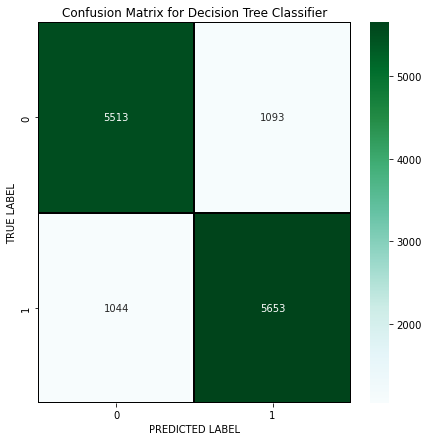

In [190]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# Random Forest Classifier

In [191]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

#Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8829587311132827
[[5711  895]
 [ 662 6035]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      6606
           1       0.87      0.90      0.89      6697

    accuracy                           0.88     13303
   macro avg       0.88      0.88      0.88     13303
weighted avg       0.88      0.88      0.88     13303



The accuracy using Random Forest Classifier is 88%

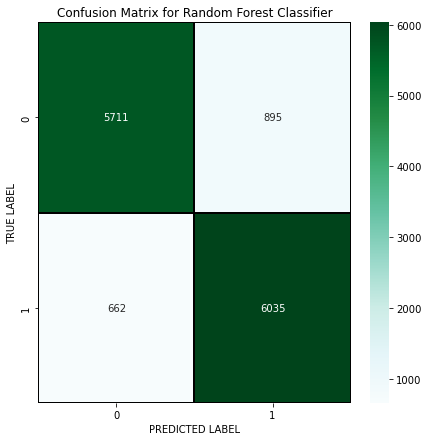

In [192]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

# Logistic Regression

In [193]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

#Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7954596707509585
[[4965 1641]
 [1080 5617]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      6606
           1       0.77      0.84      0.81      6697

    accuracy                           0.80     13303
   macro avg       0.80      0.80      0.79     13303
weighted avg       0.80      0.80      0.80     13303



The accuracy using Logistic Regression is 79%

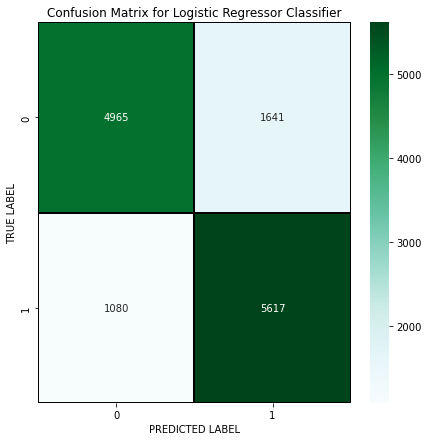

In [194]:
# let's plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Logistic Regressor Classifier")
plt.show()

# KNeighbores Classifier

In [195]:
knn = KNN()
knn.fit(x_train,y_train)

#Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8434187777193114
[[5056 1550]
 [ 533 6164]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      6606
           1       0.80      0.92      0.86      6697

    accuracy                           0.84     13303
   macro avg       0.85      0.84      0.84     13303
weighted avg       0.85      0.84      0.84     13303



The accuracy using KNN is 84%

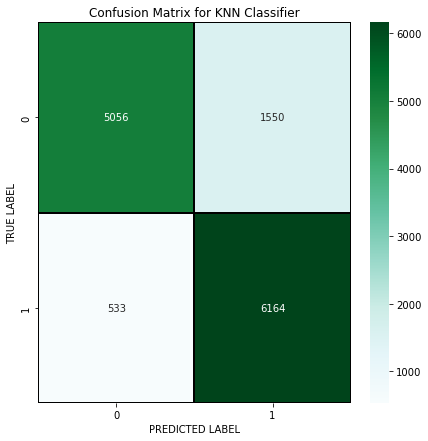

In [196]:
# let's plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()

# Gradient Boosting Classifier

In [197]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

#Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8546944298278584
[[5358 1248]
 [ 685 6012]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      6606
           1       0.83      0.90      0.86      6697

    accuracy                           0.85     13303
   macro avg       0.86      0.85      0.85     13303
weighted avg       0.86      0.85      0.85     13303



The accuracy in gradient boosting classifier is 85%

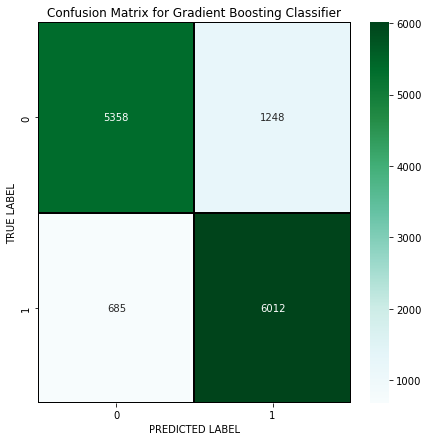

In [198]:
# let's plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True, linewidths=.2, linecolor='black', fmt = '.0f', ax=ax, cmap='BuGn', xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()

# Checking the Cross Validation Score

In [199]:
from sklearn.model_selection import cross_val_score

In [200]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())
# cv score for Random Forest Classifier
print(cross_val_score(RFC ,x,y,cv=5).mean())
# cv score for Lofistic Regression Classifier
print(cross_val_score(LR ,x,y,cv=5).mean())
# cv score for KNN Classifier
print(cross_val_score( knn,x,y,cv=5).mean())
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB ,x,y,cv=5).mean())

0.8300961222114726
0.8819876142354308
0.794822236642173
0.8476620506380319
0.8455878460057085


From the overall accuracy score and cv score we decided that Decision Tree Classifier as our best model.

# Hyper Parameter Tuning

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
# Decision Tree Classifier

parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             'splitter':['best','random']}

In [203]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [204]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'splitter': 'best'}

In [205]:
census = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',splitter='best')
census.fit(x_train,y_train)
pred = census.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.28196647372773


So here we can see the accuracy of the best model is increased after tuning.

# Plotting ROC and compare AUC for all the used models 

<function matplotlib.pyplot.show(close=None, block=None)>

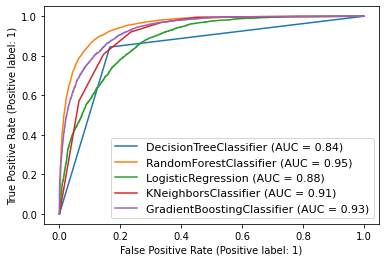

In [206]:
# plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(DTC,x_test,y_test)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show

# Plotting ROC and Compare AUC for the best model

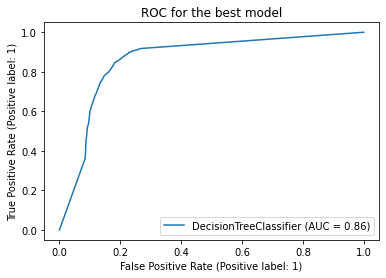

In [207]:
# let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

The AUC for the best model is 0.86

# Saving The Model

In [209]:
import joblib
joblib.dump(census,"Census Income Prediction.pkl")

['Census Income Prediction.pkl']

# Predicting the saved model

In [210]:
# let's load the saved model and get the prediction

# loading the saved model
model=joblib.load("Census Income Prediction.pkl")

# prediction
prediction= model.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 1])

In [211]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['Predicted','Original']).T

,Predicted,Original
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
13298,1,0
13299,0,0
13300,1,1
13301,0,0


So here we can see the predicted and actual values are almost same.